In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import time 

In [2]:
# Constants
DATASET_PATH = './GeneratedData/'

In [3]:
# Loading functions
def load_data_frame(txt):
    return pd.read_csv(DATASET_PATH + txt + '.txt', header=None, sep='\s+')

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/var/folders/lt/w0169b7x5ml3psz3nly9vj3m0000gn/T/ipykernel_57530/3020622685.py:3: SyntaxWarning: invalid escape sequence '\s'
  return pd.read_csv(DATASET_PATH + txt + '.txt', header=None, sep='\s+')


In [4]:
# Loading data
train_set = load_data_frame('X_train')
features = []
with open(DATASET_PATH + 'feature_names.txt') as f:
    for line in f:
        feat = line.strip()
        features.append(feat)

train_set.columns = features
train_set['activity'] = load_data_frame('y_train')

activity_labels = load_data_frame('activity_labels')
activity_labels.columns = ['id', 'activity']

features = train_set.columns.tolist()

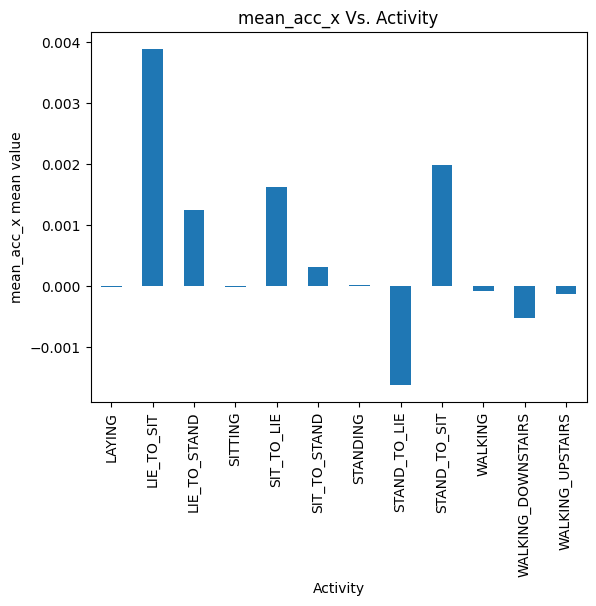

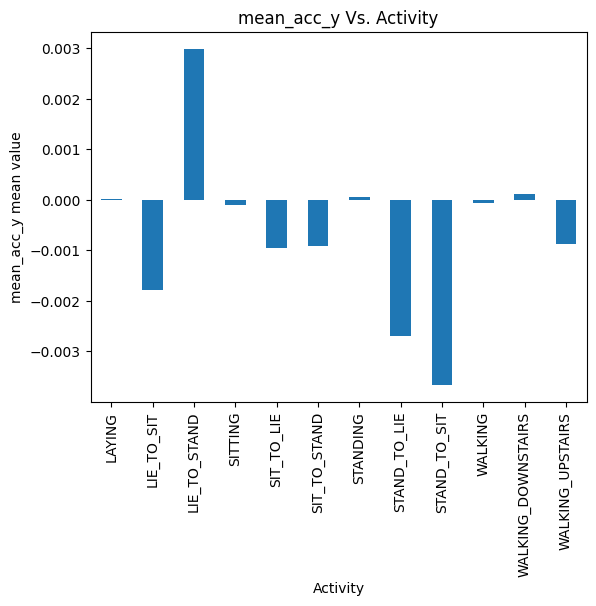

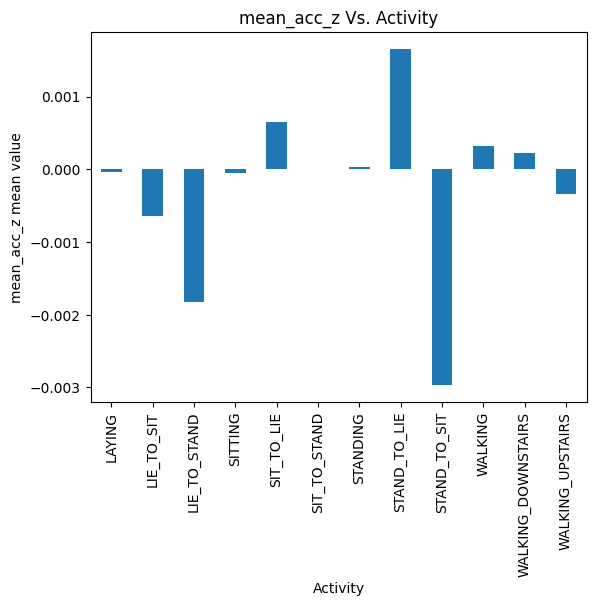

In [5]:
# Graphing features
complete_set_train = train_set.copy()
for x in activity_labels['id']:
    complete_set_train['activity'] = complete_set_train['activity'].replace(x, activity_labels['activity'][x - 1])

selected_features_graph = ['mean_acc_x' ,'mean_acc_y', 'mean_acc_z']

for selected_feature in selected_features_graph:
    if selected_feature != '':
        train_subset = complete_set_train[[selected_feature, 'activity']]
        grouped_train_by_feature = train_subset.groupby('activity').mean()

        grouped_train_by_feature.plot(kind='bar', legend=False)
        plt.title(selected_feature + ' Vs. Activity')
        plt.xlabel('Activity')
        plt.ylabel(selected_feature + ' mean value')
        plt.show()